<a href="https://colab.research.google.com/github/Saumyadeepm/FreeCodeCamp-Linear-Regression-Health-Costs-Calculator/blob/main/FreeCodeCamp_Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Problem Statement: Health Insurance Cost Prediction**

1. **Overview**
  - *The objective of this project is to develop a machine learning model that predicts health insurance costs based on various factors such as age, sex, BMI, number of children, smoking status, and region. The model aims to accurately estimate insurance expenses to assist insurance companies in pricing policies and individuals in understanding potential healthcare costs.*

1. **Dataset**
  - *The dataset used for this project contains information about individuals' attributes such as age, sex, BMI, number of children, smoking status, region, and their corresponding health insurance costs. The dataset is split into training and testing sets to train and evaluate the model's performance.*

1. **Objective**
  - *The goal is to build a regression model that can predict health insurance costs based on the provided attributes with minimal error. The model's performance will be evaluated using metrics such as mean absolute error (MAE) and mean squared error (MSE) on the test dataset.*

1. **Approach**
  - **Data Preprocessing:** *Convert categorical variables into numerical representations and normalize the dataset.*
  - **Model Building:** *Construct a neural network model using TensorFlow and Keras with appropriate input and output layers for regression.*
  - **Model Training:** *Train the model using the training dataset and evaluate its performance using validation data.*
  - **Model Evaluation:** *Evaluate the trained model's performance on the test dataset using metrics like MAE and MSE.*
  - **Visualization:** *Visualize the model's predictions against the true values using scatter plots to assess its accuracy and reliability.*

1. **Success Criteria**
  - *The project will be considered successful if the developed model achieves a mean absolute error (MAE) of less than 3500 on the test dataset. Additionally, the model's predictions should align closely with the true values as demonstrated by visualizations.*

1. **Deliverables**
  - *Trained machine learning model for health insurance cost prediction.*
  - *Evaluation report containing model performance metrics (MAE, MSE) on the test dataset.*
  - *Visualization of model predictions compared to true values for insights into performance.*
  - *Codebase including data preprocessing, model construction, training, evaluation, and visualization scripts.*


## Importing Libraries

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.utils import shuffle

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Importing Insurance Dataset for Health Costs Analysis

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-20 11:03:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-03-20 11:03:28 (104 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## Data Preprocessing and Model Training for Health Insurance Cost Prediction

In [ ]:
# Convert categorical data to numbers
dataset["sex"].replace(
    ["female", "male"],
    [0, 1],
    inplace=True
)

dataset["smoker"].replace(
    ["no", "yes"],
    [0, 1],
    inplace=True
)

dataset["region"].replace(
    ['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True
)

dataset = shuffle(dataset).reset_index(drop=True)

# Separating the train and test datasets
train_dataset  = dataset[0:int(0.8*dataset.shape[0])]
test_dataset = dataset[int(0.8*dataset.shape[0]):dataset.shape[0] - 1]

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

# Creating the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense_15 (Dense)            (None, 32)                224       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________
Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10869.5205 - ma


## Model Evaluation and Prediction Visualization for Health Insurance Cost Prediction

9/9 - 1s - loss: 1645.6011 - mae: 1645.6011 - mse: 20236462.0000 - 543ms/epoch - 60ms/step
Testing set Mean Abs Error: 1645.60 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 4ms/step


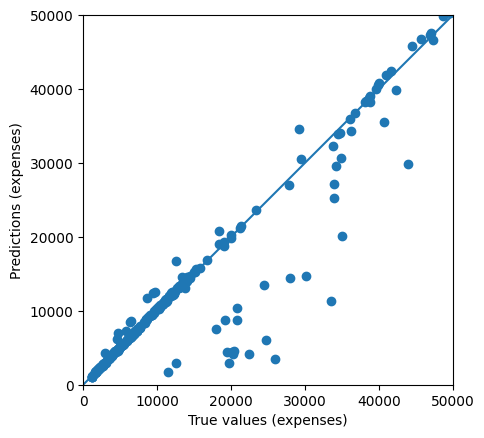

In [ ]:

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)